In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [2]:
#Reading Data
life_df = pd.read_csv('Life_Expectancy_Data.csv')

In [3]:
#Details of the data
life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
#Renaming Columns
life_df.rename(columns = {"Life expectancy ": "Life_expectancy","Adult Mortality":"Adult_mortality","infant deaths":"Infant_deaths",
                "percentage expenditure":"Percentage_expenditure","under-five deaths ": "Under_five_deaths",
"Total expenditure":"Total_expenditure",
                    " thinness  1-19 years":"Thinness_1-19_years",
                    " thinness 5-9 years":"Thinness_5-9_years",
                    "Income composition of resources":"Income_composition_of_resources",'Hepatitis B':'Hepatitis_B'}, inplace = True)

In [5]:
#Removing white spaces from column spaces
life_df= life_df.rename(columns=lambda col: col.strip())

In [6]:
life_df.info()
life_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_mortality                  2928 non-null   float64
 5   Infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   Percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  Under_five_deaths                2938 non-null   int64  
 12  Polio               

In [7]:
#To remove rows with life expectancy as null...
life_df = life_df.dropna(subset=['Life_expectancy'])

In [ ]:
life_df.isna().sum()

In [8]:
"""We are going to drop the rows with life expectancy as null as it is the value that needs to be predicted"""
def null_zero_replace_mean(life_expectancy):
    for column in list(life_df.select_dtypes(include='float64' or 'int64').columns):
        life_df[column] = np.where(life_df[column]==0, life_df[column].mean(), life_df[column])
        life_df[column] = life_df[column].fillna(life_df[column].mean())
    return life_df
life_df = null_zero_replace_mean(life_df)

In [9]:
#Conversion of obejct to int64or float64
#Since status is an object, we'll change the variables to numeric
#The values of status are only developed and developing!
status_replace_dictionary = {'Developed':1,'Developing':0}
life_df = life_df.replace({'Status':status_replace_dictionary})

In [10]:
#Dropping country column!
life_df = life_df.drop(['Country'], axis=1)

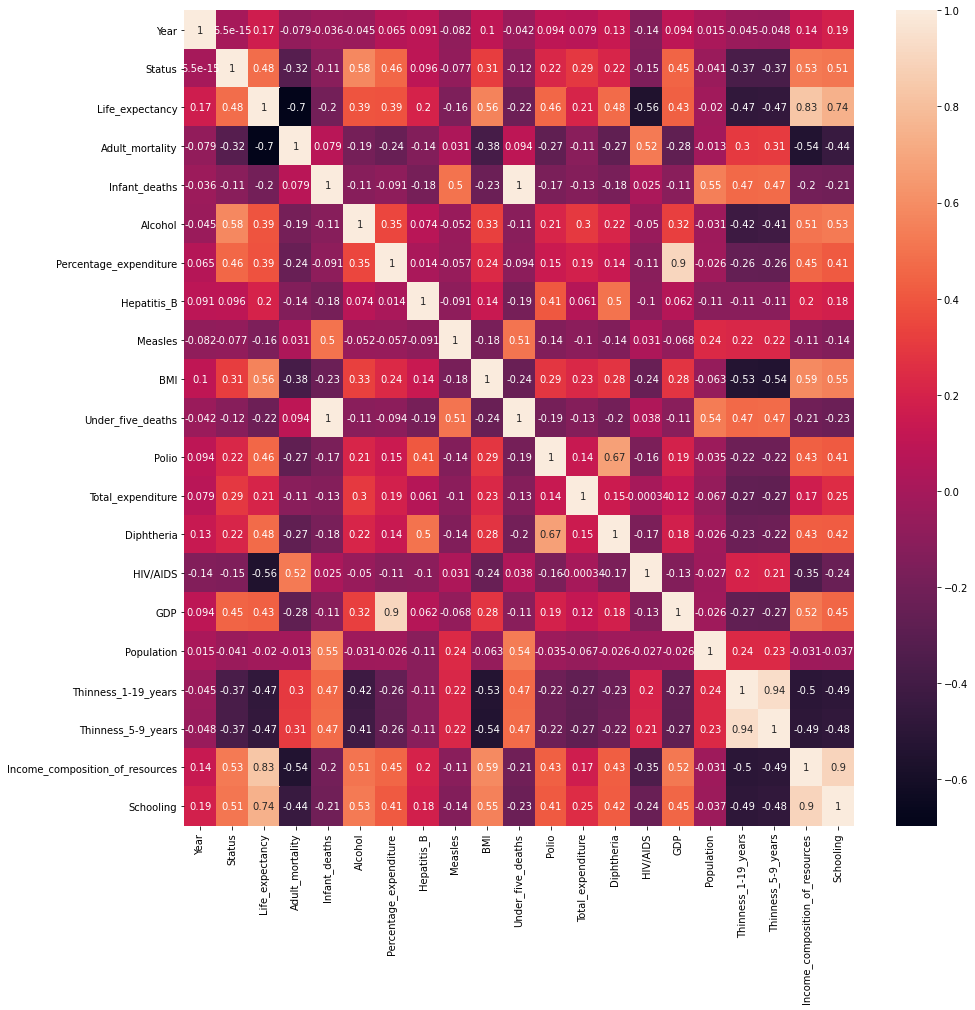

In [11]:
#Plotting heatmap to understand the coorelation between the variables(dependent and independent)
plt.figure(figsize=(15, 15))
sns.heatmap(life_df.corr(), annot=True)
plt.show()


In [12]:
#Inferences from heatmap
#Life expectancy is least dependent on Population i.e., 0.02, Hence we can drop the same from dataframe
#Dropping Population column!
life_df = life_df.drop(['Population'], axis=1)

In [13]:
#Also the values correlation value betwen life expectancy and Thinness_1-19_years &Thinness_5-9_years. 
#Hence we can use one column from the above. For now we'll consider Thinness_1-19_years, but 
#not Thinness_5-9_years.
life_df = life_df.drop(['Thinness_5-9_years'], axis=1)

<AxesSubplot:xlabel='Life_expectancy', ylabel='Count'>

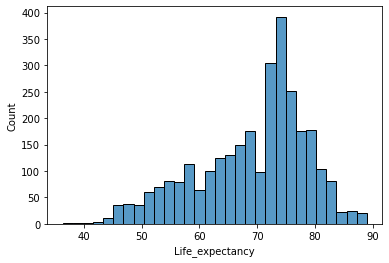

In [14]:
sns.histplot(life_df['Life_expectancy'])

<AxesSubplot:xlabel='Adult_mortality', ylabel='Count'>

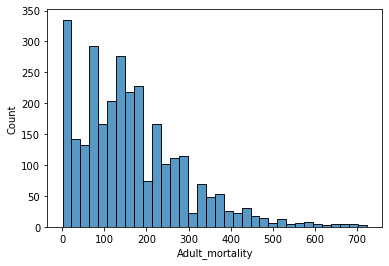

In [81]:
sns.histplot(life_df['Adult_mortality'])

<AxesSubplot:xlabel='Percentage_expenditure', ylabel='Count'>

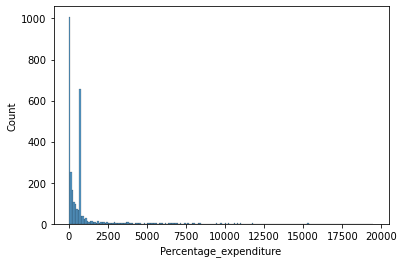

In [82]:
sns.histplot(life_df['Percentage_expenditure'])

<AxesSubplot:xlabel='Hepatitis_B', ylabel='Count'>

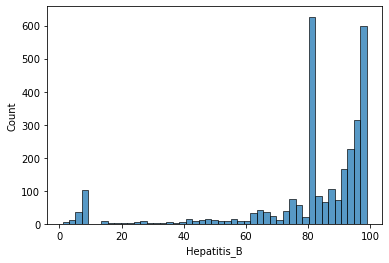

In [87]:
sns.histplot(life_df['Hepatitis_B'])

<AxesSubplot:xlabel='Measles', ylabel='Count'>

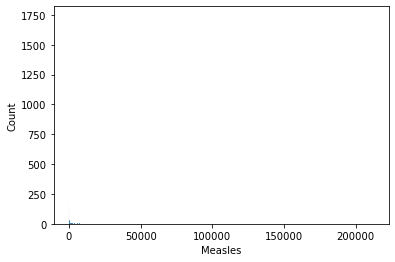

In [88]:
sns.histplot(life_df['Measles'])

<AxesSubplot:xlabel='BMI', ylabel='Count'>

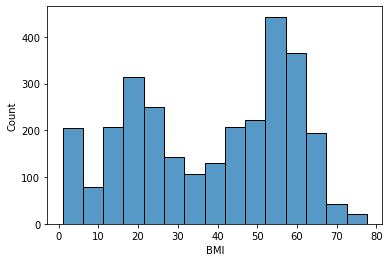

In [90]:
sns.histplot(life_df['BMI'])

<AxesSubplot:xlabel='Infant_deaths', ylabel='Count'>

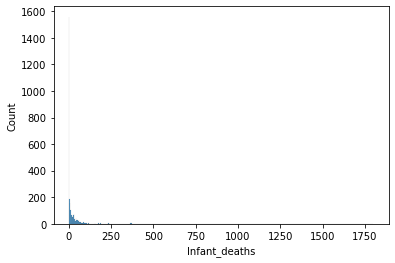

In [91]:
sns.histplot(life_df['Infant_deaths'])

<AxesSubplot:xlabel='Polio', ylabel='Count'>

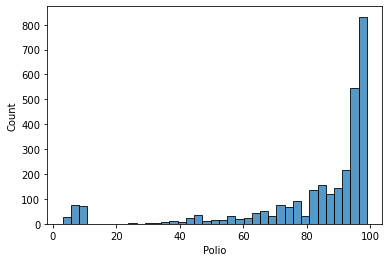

In [92]:
sns.histplot(life_df['Polio'])

<AxesSubplot:xlabel='Diphtheria', ylabel='Count'>

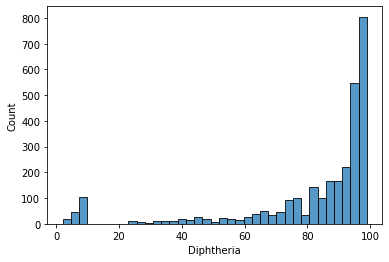

In [93]:
sns.histplot(life_df['Diphtheria'])

<AxesSubplot:xlabel='Schooling', ylabel='Count'>

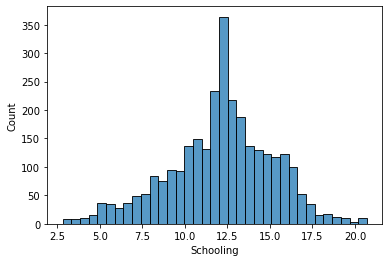

In [94]:
sns.histplot(life_df['Schooling'])

<AxesSubplot:xlabel='Income_composition_of_resources', ylabel='Count'>

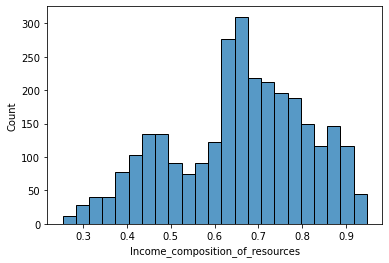

In [96]:
sns.histplot(life_df['Income_composition_of_resources'])

<AxesSubplot:xlabel='Thinness_1-19_years', ylabel='Count'>

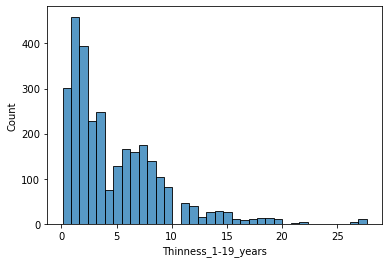

In [98]:
sns.histplot(life_df['Thinness_1-19_years'])

<AxesSubplot:xlabel='Under_five_deaths', ylabel='Count'>

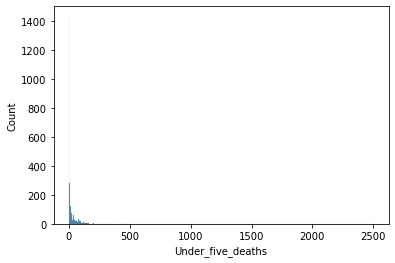

In [99]:
sns.histplot(life_df['Under_five_deaths'])

In [15]:
#Data Description
life_df.describe()

,Year,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,Hepatitis_B,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Thinness_1-19_years,Income_composition_of_resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000
mean,2007.50000,0.174863,69.224932,164.796448,30.407445,4.614856,893.543397,80.960842,2427.855874,38.235394,42.179303,82.548298,5.930163,82.321416,1.747712,7494.210719,4.850622,0.656886,12.112352
std,4.61056,0.379915,9.523867,124.292079,118.114450,3.914923,1956.232911,22.531361,11485.970937,19.850184,160.700547,23.340548,2.385478,23.629576,5.085542,13157.128331,4.396597,0.154187,3.048843
min,2000.00000,0.000000,36.300000,1.000000,0.000000,0.010000,0.099872,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,0.100000,0.253000,2.800000
25%,2003.75000,0.000000,63.100000,74.000000,0.000000,1.107500,50.746302,80.960842,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,578.797095,1.600000,0.554000,10.375000
50%,2007.50000,0.000000,72.100000,144.000000,3.000000,4.160000,322.177866,87.000000,17.000000,43.000000,4.000000,93.000000,5.930163,93.000000,0.100000,3112.560501,3.400000,0.662000,12.112352
75%,2011.25000,0.000000,75.700000,228.000000,22.000000,7.400000,740.321185,96.000000,362.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,7494.210719,7.100000,0.773000,14.100000
max,2015.00000,1.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,27.700000,0.948000,20.700000


In [78]:
#Predict the value again
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

#x = life_df[['Status','Adult_mortality','Infant_deaths',
#             'Alcohol','Percentage_expenditure',
#        'Hepatitis_B','Measles','BMI','Under_five_deaths',
#'Polio','Total_expenditure','Diphtheria','HIV/AIDS',
#       'GDP','Thinness_1-19_years',
#    'Income_composition_of_resources','Schooling']]


#x = life_df[['Status','Adult_mortality',
#'Alcohol','Percentage_expenditure',
#        'Hepatitis_B','BMI','Under_five_deaths',
#'Polio','Total_expenditure','Diphtheria','HIV/AIDS',
#       'GDP','Thinness_1-19_years',
#    'Income_composition_of_resources','Schooling']]

#x = life_df[['Adult_mortality',
#'Alcohol','Percentage_expenditure',
#        'Hepatitis_B','BMI',
#'Polio','Diphtheria','HIV/AIDS',
#       'GDP',
#    'Income_composition_of_resources','Schooling']]

#x = life_df[['Adult_mortality',
#'Alcohol','Percentage_expenditure',
#        'Hepatitis_B','BMI','HIV/AIDS',
#       'GDP','Polio',
#    'Income_composition_of_resources','Schooling']]

#x = life_df[['Adult_mortality',
#'Alcohol','Percentage_expenditure','BMI','HIV/AIDS',
#       'GDP','Polio',
#    'Income_composition_of_resources','Schooling']]

#x = life_df[['Adult_mortality','Percentage_expenditure','BMI','HIV/AIDS',
#       'GDP','Polio',
#    'Income_composition_of_resources','Schooling']]

#x = life_df[['Adult_mortality','BMI','HIV/AIDS',
#       'GDP','Polio',
#    'Income_composition_of_resources','Schooling']]

#x = life_df[['Adult_mortality','BMI','HIV/AIDS','Percentage_expenditure','Polio','Income_composition_of_resources','Schooling']]
x = life_df[['Adult_mortality','BMI','HIV/AIDS','GDP','Polio','Income_composition_of_resources','Schooling','Status']]
y = life_df['Life_expectancy']

#Data Standardization
#Standard Preprocessing:

#First split the data as test and train!!
std_scaler = StandardScaler()
x = std_scaler.fit_transform(x)

x_train,x_test,y_train,y_test  = train_test_split(x, y, test_size = 0.3, shuffle = True,random_state=9)
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
y_pred_train = regr.predict(x_train)
score = regr.score(x_test,y_test)
train_score = regr.score(x_train,y_train)

print("R2 value::",metrics.r2_score(y_test, y_pred))
print("Training Accuracy::",train_score)
print('Mean squared error:Test ', mean_squared_error(y_test, y_pred))
print('Mean squared error:Train ', mean_squared_error(y_train, y_pred_train))
print('Mean Absolute Percentage Error (MAPE) - Test:', metrics.mean_absolute_percentage_error(y_test, y_pred))
print('Mean Absolute Percentage Error (MAPE) - Train:', metrics.mean_absolute_percentage_error(y_train, y_pred_train))
print("RMSE Test::",np.sqrt(np.mean(np.square(y_test-y_pred))))
RmseTrain=np.sqrt(np.mean(np.square(y_train-y_pred_train)))
print("Rmse Train::",RmseTrain)


R2 value:: 0.818214916922127
Training Accuracy:: 0.8268122203027741
Mean squared error:Test  16.328595612094034
Mean squared error:Train  15.766578518528515
Mean Absolute Percentage Error (MAPE) - Test: 0.04530095834712334
Mean Absolute Percentage Error (MAPE) - Train: 0.04400495890861552
RMSE Test:: 4.040865700823778
Rmse Train:: 3.970715114249385


In [77]:
#Polynomial Regression
#Predict the value again
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

x = life_df[['Adult_mortality','BMI','HIV/AIDS','GDP','Polio','Income_composition_of_resources','Schooling']]

y = life_df['Life_expectancy']

#First split the data as test and train!!
x_train,x_test,y_train,y_test  = train_test_split(x, y, test_size = 0.3, shuffle = True,random_state=9)

#Data Standardization
#Standard Preprocessing:
std_scaler = StandardScaler()
x = std_scaler.fit_transform(x)

y_prediction = []
polynomial_regression = PolynomialFeatures(degree=2)
x_polynomial = polynomial_regression.fit_transform(x_train) 
lin_regr = LinearRegression()
lin_regr.fit(x_polynomial, y_train)
y_prediction = lin_regr.predict(polynomial_regression.transform(x_test))
print("R2 value1::",metrics.r2_score(y_test, y_prediction))
print("Training Accuracy::",train_score)
print('Mean squared error:Test ', mean_squared_error(y_test, y_prediction))
#print('Mean squared error:Train ', mean_squared_error(y_train, y_pred_train))
print('Mean Absolute Percentage Error (MAPE) - Test:', metrics.mean_absolute_percentage_error(y_test, y_prediction))
#print('Mean Absolute Percentage Error (MAPE) - Train:', metrics.mean_absolute_percentage_error(y_train, y_pred_train))
print("RMSE Test::",np.sqrt(np.mean(np.square(y_test-y_prediction))))
#RmseTrain=np.sqrt(np.mean(np.square(y_train-y_pred_train)))
print("Rmse Train::",RmseTrain)

R2 value1:: 0.8953487622816384
Training Accuracy:: 0.8269421372311456
Mean squared error:Test  9.400153808419095
Mean Absolute Percentage Error (MAPE) - Test: 0.033490538382474414
RMSE Test:: 3.065967026635986
Rmse Train:: 3.9422178646094843


In [79]:
#Lasso Regression!
#Predict the value again
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

#x = life_df[['Adult_mortality','BMI','HIV/AIDS','Percentage_expenditure','Polio','Income_composition_of_resources','Schooling']]
x = life_df[['Adult_mortality','BMI','HIV/AIDS','GDP','Polio','Income_composition_of_resources','Schooling']]
y = life_df['Life_expectancy']

#First split the data as test and train!!
x_train,x_test,y_train,y_test  = train_test_split(x, y, test_size = 0.3, shuffle = True,random_state=9)

#Data Standardization
#Standard Preprocessing:
std_scaler = StandardScaler()
x = std_scaler.fit_transform(x)
y_prediction = []
lasso_reg = linear_model.Lasso(alpha=1,max_iter=100,tol=0.1)
lasso_reg.fit(x_train,y_train)
#y_prediction = lasso_reg.fit(x_test,y_test)
print('Lasso reg train::',lasso_reg.score(x_train,y_train))
print('Lasso reg test::',lasso_reg.score(x_test,y_test))

Lasso reg train:: 0.7924547196469007
Lasso reg test:: 0.7984271072565461


In [80]:
#Ridge Regression!
#Predict the value again
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

#x = life_df[['Adult_mortality','BMI','HIV/AIDS','Percentage_expenditure','Polio','Income_composition_of_resources','Schooling']]
x = life_df[['Adult_mortality','BMI','HIV/AIDS','GDP','Polio','Income_composition_of_resources','Schooling','Status']]
y = life_df['Life_expectancy']

#First split the data as test and train!!
x_train,x_test,y_train,y_test  = train_test_split(x, y, test_size = 0.3, shuffle = True,random_state=9)

#Data Standardization
#Standard Preprocessing:
std_scaler = StandardScaler()
x = std_scaler.fit_transform(x)
y_prediction = []
ridge_reg = linear_model.Ridge(alpha=0.1,max_iter=100,tol=0.1)
ridge_reg.fit(x_train,y_train)
#y_prediction = lasso_reg.fit(x_test,y_test)
print('Ridge reg train::',ridge_reg.score(x_train,y_train))
print('Ridge reg test::',ridge_reg.score(x_test,y_test))

Ridge reg train:: 0.8268065953437462
Ridge reg test:: 0.8183711860246782


In [104]:
#Outlier detection and removal!!
life_df_dict =  {'Adult_mortality':1,'BMI':2,
'HIV/AIDS':3,'GDP':4,'Polio':5,'Income_composition_of_resources':6,'Schooling':7,'Status':8}
for variable in life_df_dict.keys():
    q75, q25 = np.percentile(life_df[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
                                                                             len((np.where((life_df[variable] > max_val) | 
                                                                                           (life_df[variable] < min_val))[0])),len((np.where((life_df[variable] > max_val) | 
                                                                                           (life_df[variable] < min_val))[0]))*100/1987))


Number of outliers and percentage of it in Adult_mortality : 82 and 4.12682435832914
Number of outliers and percentage of it in BMI : 0 and 0.0
Number of outliers and percentage of it in HIV/AIDS : 542 and 27.27730246602919
Number of outliers and percentage of it in GDP : 300 and 15.09813789632612
Number of outliers and percentage of it in Polio : 278 and 13.990941117262205
Number of outliers and percentage of it in Income_composition_of_resources : 0 and 0.0
Number of outliers and percentage of it in Schooling : 54 and 2.7176648213387016
Number of outliers and percentage of it in Status : 512 and 25.767488676396578


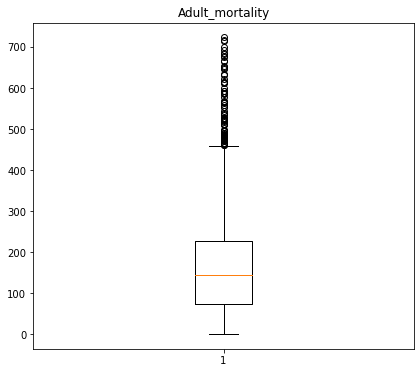

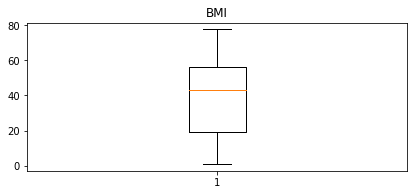

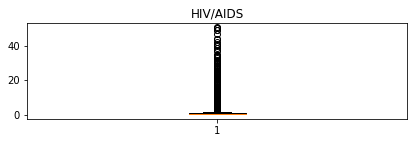

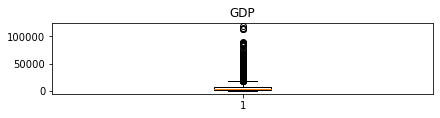

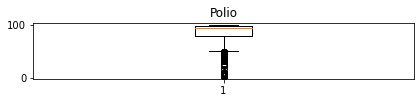

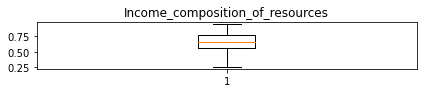

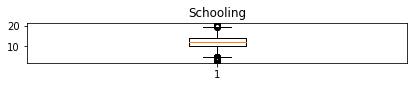

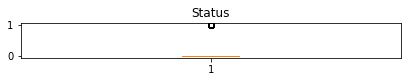

In [135]:
from scipy.stats.mstats import winsorize
#plt.figure(figsize=(18,6))
life =['Adult_mortality','BMI','HIV/AIDS','GDP','Polio','Income_composition_of_resources','Schooling','Status']
x=z=1
for element in life:
    plt.figure(figsize=(15,6))
    plt.subplot(x,2,z)
    original = life_df[element]
    plt.boxplot(original)
    plt.title(element)
    plt.show()
    x=x+1
    z=z+1